# Portfolio Optimization - Data Exploration

This notebook explores the initial data collection and portfolio optimization implementation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

from portfolio_optimization.data import DataCollector, setup_logger as data_logger
from portfolio_optimization.optimization import PortfolioOptimizer, setup_logger as optimizer_logger

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]  # Larger default figure size
plt.rcParams['axes.grid'] = True          # Always show grid
plt.rcParams['axes.spines.top'] = False   # Remove top spine
plt.rcParams['axes.spines.right'] = False # Remove right spine
sns.set_palette('husl')                   # Set color palette

# Set up loggers with no console output
data_logger(console_level=None)
optimizer_logger(console_level=None)

<Logger portfolio_optimization.optimization.optimizer (INFO)>

## 1. Data Collection and Preprocessing

In [2]:
# Initialize data collector with config file
data_collector = DataCollector()

# Get list of stocks and ETFs from config
tickers = data_collector.config['universe']['stocks'] + data_collector.config['universe']['etfs']

# Fetch and process data
data = data_collector.process_data(tickers)
prices = data['prices']
returns = data['returns']['daily']

print(f"Data shape: {returns.shape}\n")
print("First few rows of returns:")
returns.head()

Data shape: (2922, 9)

First few rows of returns:


,AAPL,MSFT,GOOGL,AMZN,META,NVDA,AGG,DBC,UUP
Date,,,,,,,,,
2012-05-21,0.058260,0.016399,0.022835,0.019921,-0.109861,0.017384,-0.000181,0.013323,-0.003117
2012-05-22,-0.007679,0.000336,-0.021674,-0.012746,-0.089039,-0.012206,-0.002433,-0.014275,0.010272
2012-05-23,0.024400,-0.021842,0.014414,0.009056,0.032258,0.024712,0.001174,-0.011052,0.003537
2012-05-24,-0.009184,-0.001374,-0.009517,-0.009389,0.032187,-0.026527,-0.000811,0.000385,0.003965
2012-05-25,-0.005359,-0.000344,-0.020094,-0.010918,-0.033909,0.023947,0.001535,0.003467,0.001316


### Data Quality Checks

In [3]:
# Check for missing values
print("Missing values:")
print(returns.isnull().sum())

# Calculate basic statistics
print("\nBasic statistics:")
stats = returns.describe()
display(stats)

Missing values:
AAPL     0
MSFT     0
GOOGL    0
AMZN     0
META     0
NVDA     0
AGG      0
DBC      0
UUP      0
dtype: int64

Basic statistics:


,AAPL,MSFT,GOOGL,AMZN,META,NVDA,AGG,DBC,UUP
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,0.001011,0.001089,0.000909,0.001116,0.001082,0.002159,0.000065,0.000026,0.000109
std,0.017896,0.016751,0.017078,0.020377,0.025280,0.027820,0.003072,0.010764,0.004496
min,-0.128647,-0.147390,-0.116342,-0.140494,-0.263901,-0.187559,-0.040010,-0.079444,-0.032070
25%,-0.007521,-0.006784,-0.007092,-0.008733,-0.010045,-0.011049,-0.001307,-0.005684,-0.002456
50%,0.000889,0.000734,0.000784,0.000935,0.000999,0.001936,0.000178,0.000625,0.000000
75%,0.010317,0.009481,0.009239,0.011422,0.012825,0.015150,0.001502,0.005959,0.002729
max,0.119809,0.142169,0.162584,0.141311,0.296115,0.298067,0.023721,0.047990,0.037821


## 2. Exploratory Data Analysis

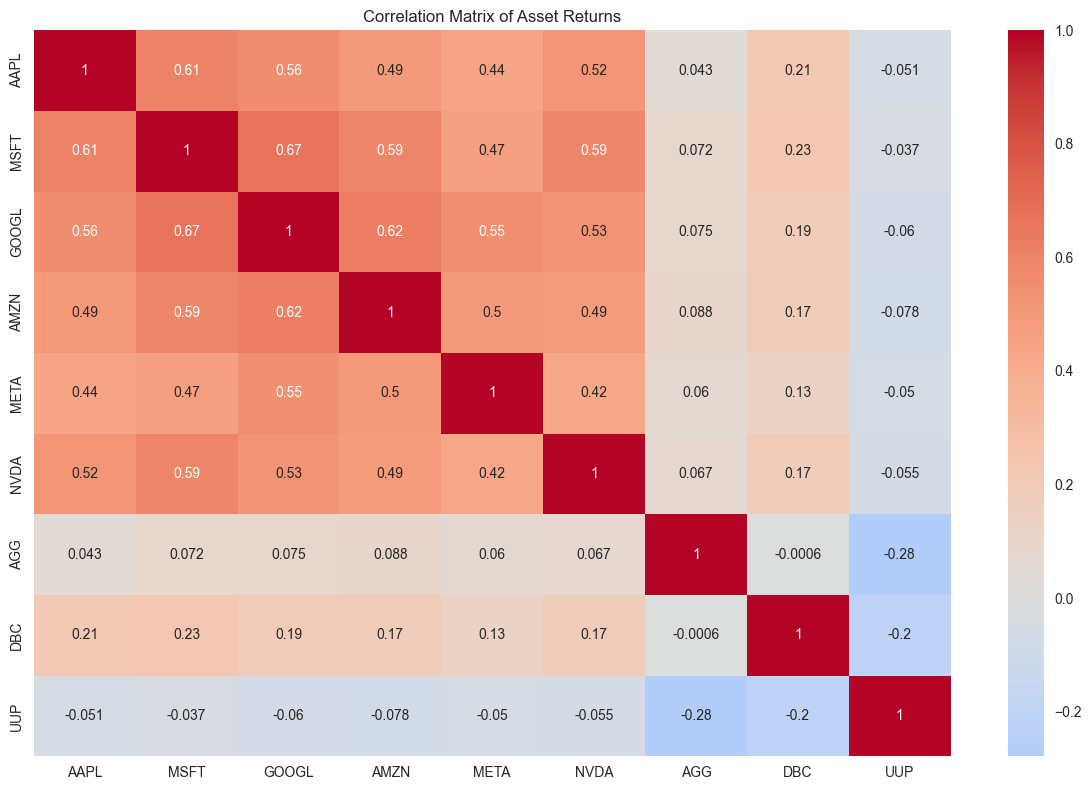

In [4]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Asset Returns')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

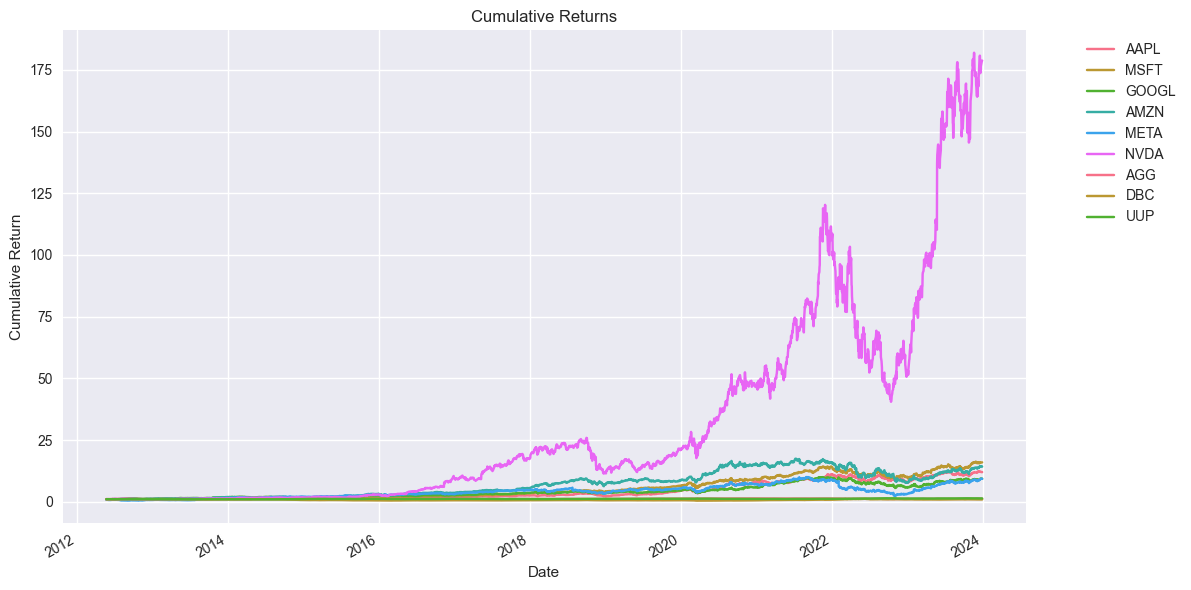

In [5]:
# Plot cumulative returns
cumulative_returns = (1 + returns).cumprod()
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_64360/2864142405.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


<Figure size 1200x600 with 0 Axes>

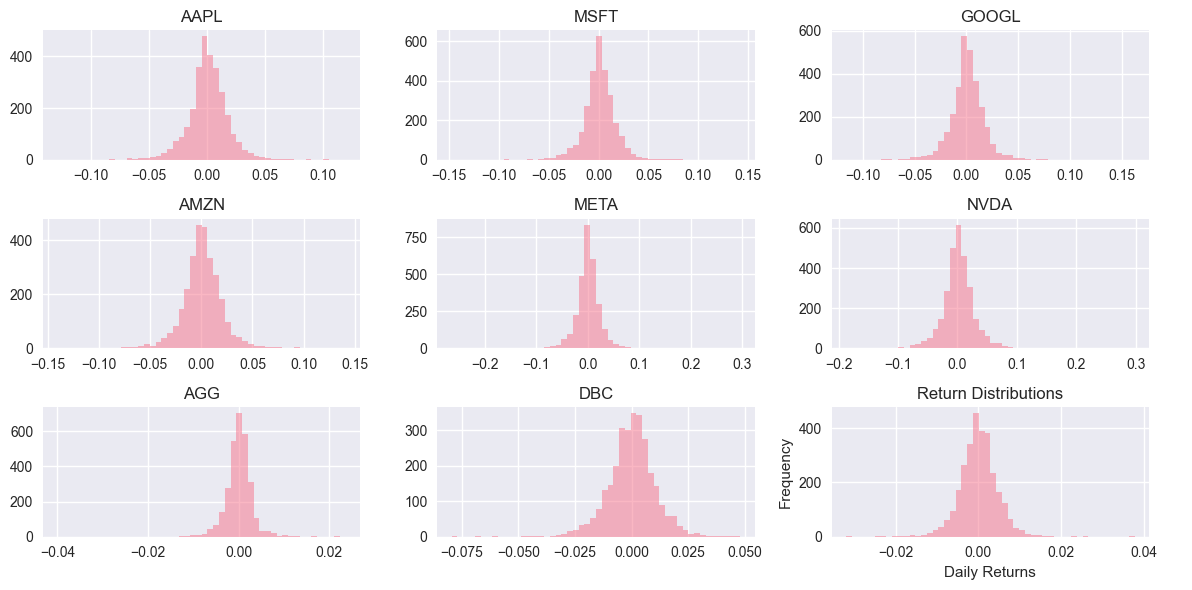

In [6]:
# Plot return distributions
plt.figure(figsize=(12, 6))
returns.hist(bins=50, alpha=0.5)
plt.title('Return Distributions')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 3. Portfolio Optimization

In [7]:
# Initialize optimizer with the data
optimizer = PortfolioOptimizer()

# Generate efficient frontier
ef = optimizer.generate_efficient_frontier(returns, verbose=False)


In [8]:
ef.head()

,return,volatility,sharpe_ratio,weights,return_diff,volatility_diff
0,0.201245,0.155890,1.034348,"{'AAPL': 0.10746509782106904, 'MSFT': 0.166666...",NaN,NaN
1,0.201614,0.156122,1.035181,"{'AAPL': 0.10811270099383709, 'MSFT': 0.166666...",0.000369,0.000232
2,0.201798,0.156237,1.035593,"{'AAPL': 0.10843699639400844, 'MSFT': 0.166666...",0.000184,0.000116
3,0.201928,0.156319,1.035883,"{'AAPL': 0.10866606489684881, 'MSFT': 0.166666...",0.000130,0.000082
4,0.202858,0.156906,1.037934,"{'AAPL': 0.11028877012734023, 'MSFT': 0.166666...",0.000929,0.000586


<Figure size 1200x600 with 0 Axes>

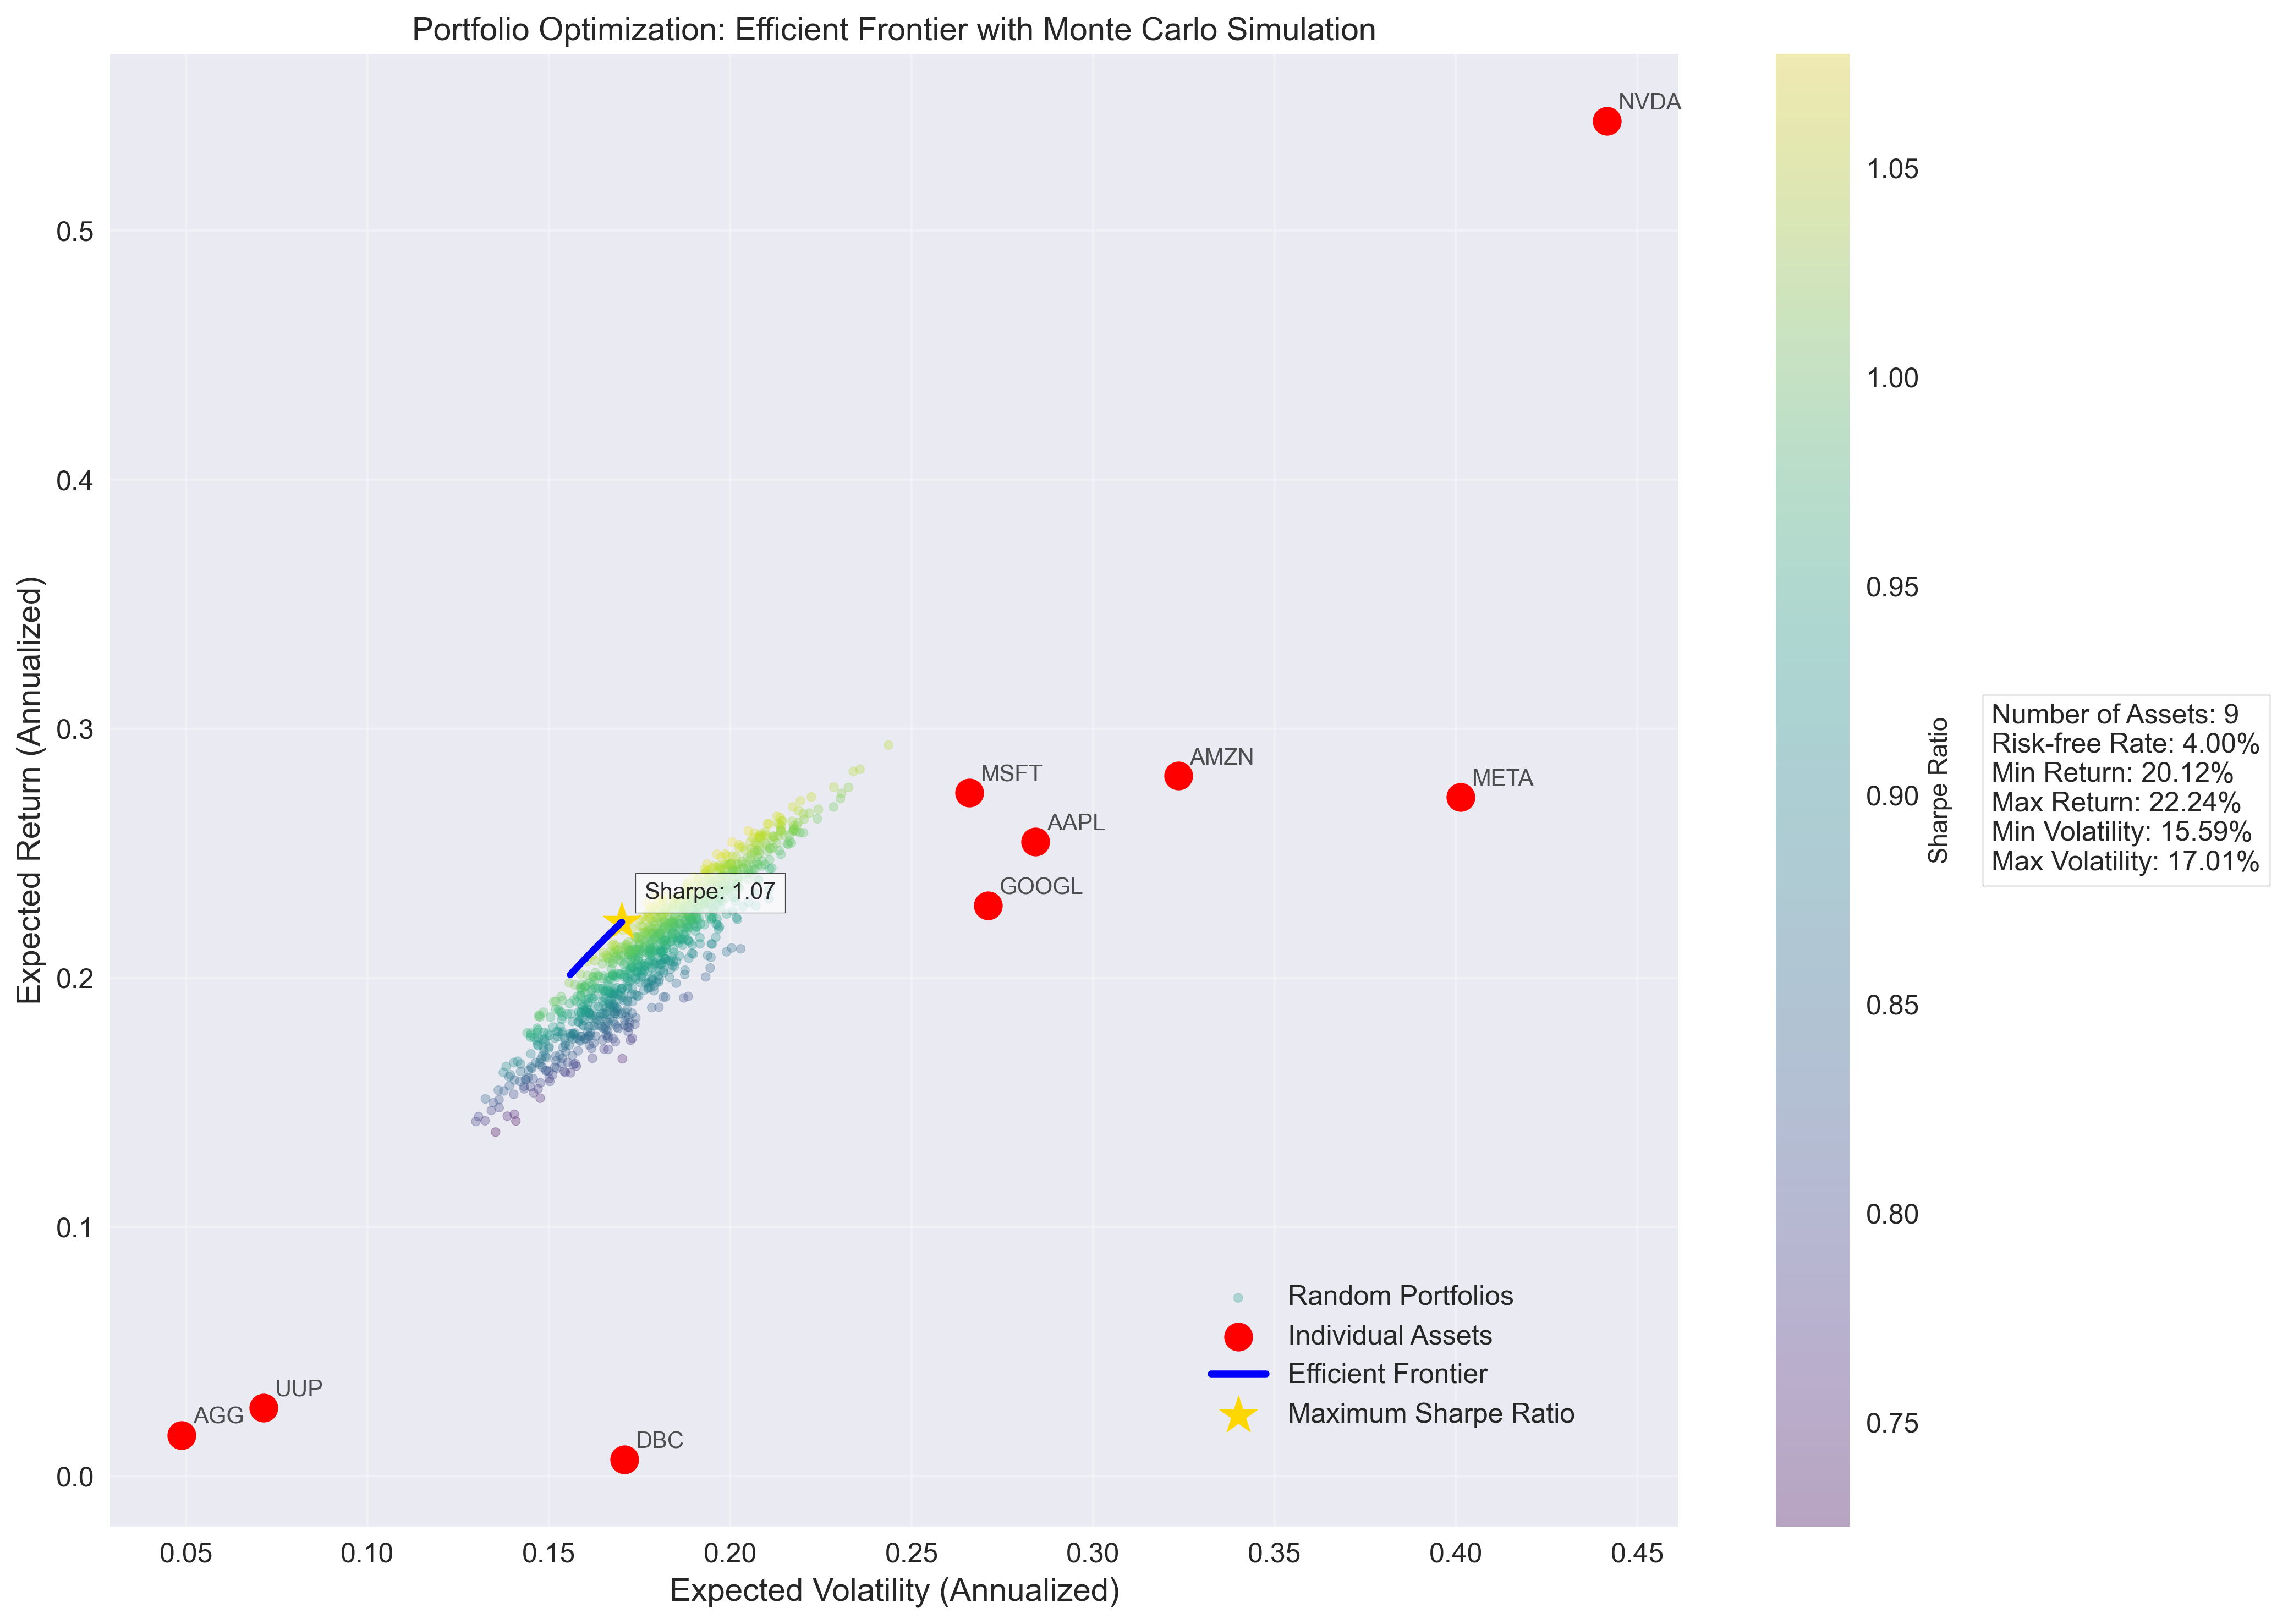

In [9]:
# Plot efficient frontier
fig = optimizer.plot_efficient_frontier(ef, show_sharpe=True, show_assets=True, returns=returns, show_plot=True);

<Figure size 1200x600 with 0 Axes>

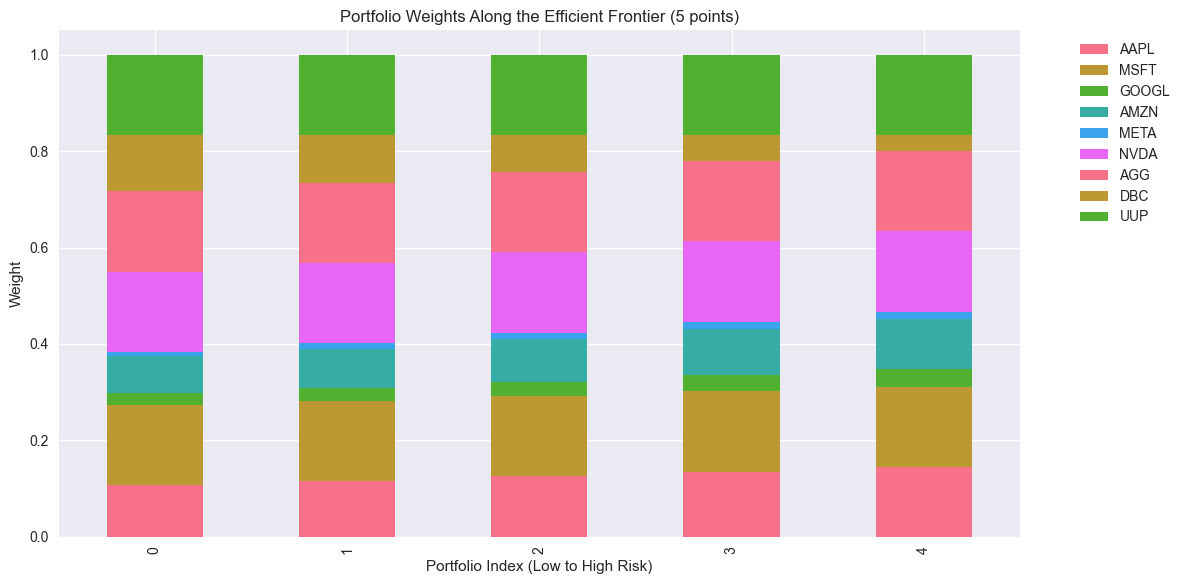

In [10]:
# Plot portfolio weights for selected points
optimizer.plot_portfolio_weights(ef, n_points=5, show_plot=True);